Problem statement: In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Analyticsvidhya/main/Time_Series_Forecasting/Train_SU63ISt.csv")

In [4]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
df1=pd.read_csv("https://raw.githubusercontent.com/Nikhil-V98/Analyticsvidhya/main/Time_Series_Forecasting/Train_SU63ISt.csv", index_col=[1], parse_dates=[0])

In [11]:
df1=df1.drop("ID",axis =1)

In [12]:
df1.head()

,Count
Datetime,
25-08-2012 00:00,8
25-08-2012 01:00,2
25-08-2012 02:00,6
25-08-2012 03:00,2
25-08-2012 04:00,2


In [8]:
df1.describe()

,Count
count,18288.000000
mean,138.958115
std,153.467461
min,2.000000
25%,22.000000
50%,84.000000
75%,210.000000
max,1244.000000


<AxesSubplot:xlabel='Datetime'>

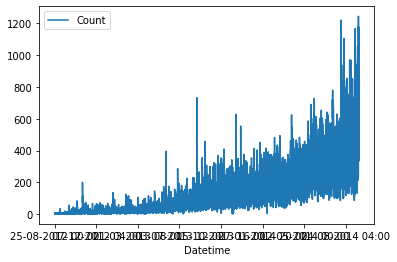

In [13]:
df1.plot() #almost a stationary series

In [14]:
# also called as smoothing
moving_average_count=df1.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic. 

In [15]:
moving_average_count

,Count
Datetime,
25-08-2012 00:00,NaN
25-08-2012 01:00,NaN
25-08-2012 02:00,NaN
25-08-2012 03:00,NaN
25-08-2012 04:00,NaN
...,...
25-09-2014 19:00,580.2
25-09-2014 20:00,582.5
25-09-2014 21:00,590.3


<AxesSubplot:xlabel='Datetime'>

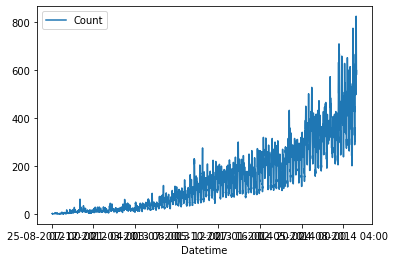

In [16]:
moving_average_count.plot() # we can see that there is a peak in the month of october

In [17]:
sm.stats.durbin_watson(df1) # very less correlation

array([0.03928653])

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


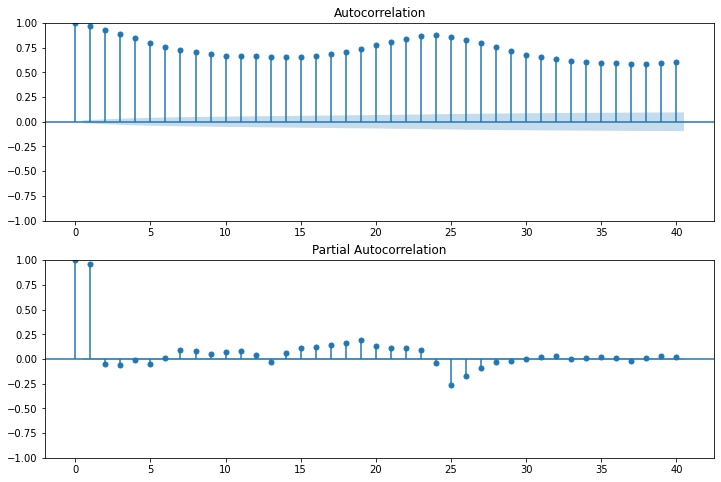

In [18]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1, lags=40, ax=ax2)

In [19]:
training_data = df1[0:round(df.shape[0]*0.8)]
test_data = df1[round(df.shape[0]*0.8):]

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
arima= ARIMA(training_data,order=(2,1,3))

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic 

In [22]:
model=arima.fit()

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [23]:
model.aic

138825.9523635402

In [28]:
pred= model.forecast(len(test_data))

c:\Users\Nik\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [29]:
pred

14630    209.476364
14631    208.787557
14632    208.586259
14633    208.538908
14634    208.524783
            ...    
18283    208.520229
18284    208.520229
18285    208.520229
18286    208.520229
18287    208.520229
Name: predicted_mean, Length: 3658, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
np.sqrt(mean_squared_error(test_data,pred))

222.77129604233622